# Describing Distributions (Core)
Name: Mike McCann <br>
Date: 03 MAY 2022

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

sns.set_context('talk')

## Read and Check Data

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(url)

In [3]:
display(df.head())
print('\n')
df.info(3)

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighB

## Distribution

### Define Graphing Function

In [4]:
def dist_graph(col):
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    posstd = mean + std
    negstd = mean - std

    fig,ax = plt.subplots(figsize=(8,5))
    sns.histplot(feature, ax = ax, stat='probability', kde = True)
    ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
    ax.axvline(median, color = 'green', label = f'Median = {median:,.2f}')
    for i in list([posstd, negstd]):
        ax.axvline(i, color = 'black')
    ax.axvspan(posstd, negstd, color = 'yellow', zorder = 0, alpha = .2)
    ax.set_title(f'{col}', size = 18, weight = 'bold')
    ax.set_xlabel(f'{col}', size = 14, weight = 'semibold')
    ax.set_ylabel('Probability', size = 14, weight = 'semibold')
    ax.legend()
    fig.tight_layout();

### Create Graphs

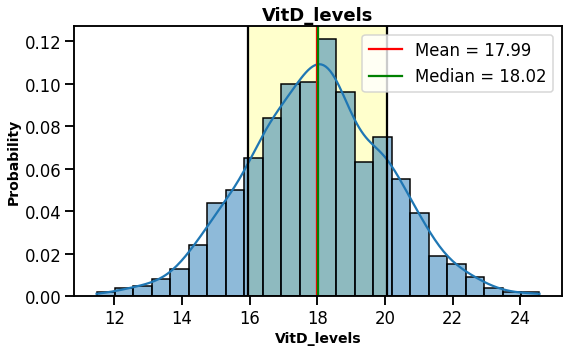

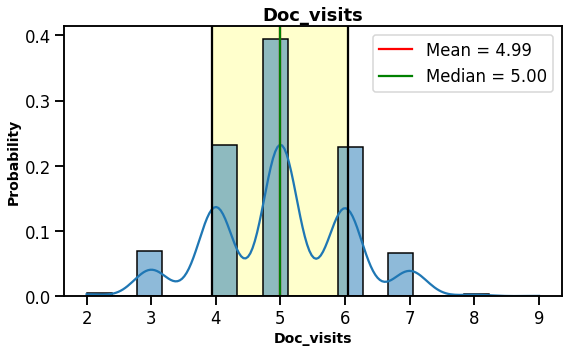

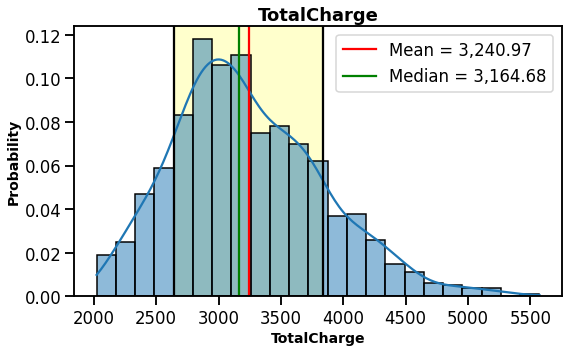

In [5]:
values_of_interest = ['VitD_levels', 'Doc_visits', 'TotalCharge']

for j in values_of_interest:
    dist_graph(j)

### Check Kurtosis values.

In [6]:
for k in values_of_interest:
    print(f'{k}')
    print(round(stats.kurtosis(df[k], fisher = False),2), '\n') 

VitD_levels
3.01 

Doc_visits
2.99 

TotalCharge
3.27 



### Distributions Described
- Vitamin D Levels:
    - Continuous values.
    - Not Skewed. Normally Distributed.
    - kurtosis value of ~3. Mesokurtic

- Doctor Visits:
    - Discrete values.
    - Not Skewed. Normally Distributed.
    - kurtosis value of ~3. Mesokurtic

- Total Charge: 
    - Continuous values.
    - Skewed slightly negative with a tail to the right.
    - kurtosis value of ~3. Mesokurtic